## Comparison between interhemispheric values
Draw comparison of the interhemispheric values captured both by the area of the corpus callosum and the fibers

Doing both correction and no correction, and observing them by center.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statannot import add_stat_annotation
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats
from statannotations.Annotator import Annotator
import itertools 

# ignore warnings for easier plotting
import warnings
warnings.filterwarnings("ignore")

from load_data import load_data

In [2]:
sns.set(style='darkgrid', context='talk', palette='Set1', font="serif")

In [3]:
# Hue colors order and names
# auxiliar dict to put correct order in the figure
map_hue_color = {
    "EDSS_group": ["EDSS<3", "EDSS>=3"],
    "SDMT_group": ["SDMT>=40", "SDMT<40"],
    "G_norm": ['G_z<=0', 'G_z>0'], 
    "Corr_norm": ['C_z<=0', 'C_z>0'],
    "disease": ["HC", "MS"],
    "GROUP": ["HC", "CIS", "RRMS", "SPMS", "PPMS"],
    "CENTER": ["CLINIC", "MAINZ", "MILAN", "NAPLES", "OSLO", "LONDON", "AMSTERDAM"],
    "groups" : ["HC", "EDSS<3", "EDSS>=3", "SDMT>=40", "SDMT<40"]
    # "GROUP": ["HC", "RRMS", "SPMS", "PPMS"]
}

# get the progressives together.
mapping_prog = {
    "HC": "HC",
    "CIS": "CIS", 
    "RRMS": "RRMS", 
    "SPMS": "PMS", 
    "PPMS": "PMS"
}

df_merged = load_data()

Initial length: 730
disease
HC    216
MS    514
dtype: int64
QC N: 5
QC Y: 724
LONDON2: 27


In [4]:
len(df_merged)

# print for each center, the interquartile range of EDSS. Do it in the format median (25% IQR, 75% IQR)
for center in df_merged.CENTER.unique():
    df_center = df_merged[df_merged.CENTER == center]
    print(center, df_center.EDSS.median(), "(", df_center.EDSS.quantile(0.25), df_center.EDSS.quantile(0.75), ")")

CLINIC 2.5 ( 1.5 3.875 )
MAINZ 1.5 ( 1.0 2.0 )
MILAN 3.75 ( 1.5 6.125 )
NAPLES 4.5 ( 2.5 6.0 )
OSLO 2.0 ( 1.5 2.875 )
LONDON 1.5 ( 1.0 2.0 )
AMSTERDAM 3.5 ( 2.5 5.5 )


## Compare interhemispheric values globally

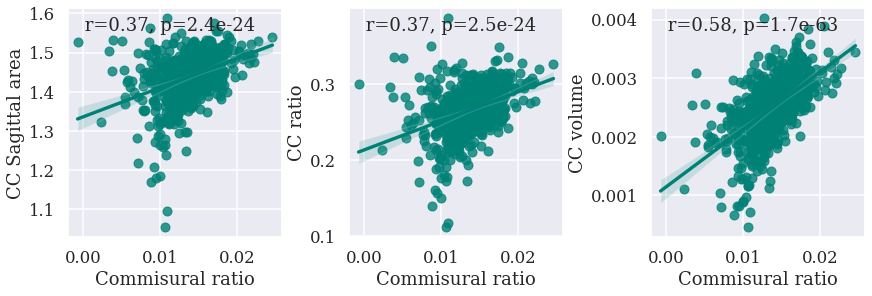

In [13]:
def annotate(col1, col2, data, multihue=False, **kwargs):
    if len(data[col1]) >= 2 or len(data[col2]) >= 2:
        r, p = stats.pearsonr(data[col1], data[col2])
        ax = plt.gca()

        # hardcoded, udpate if working with other labels
        x_pos = 0.05
        if multihue:
            label = kwargs["label"]
            dict_of_labels = {"CIS": 0, "RRMS": 1, "PMS": 2, 'MS':0, 'HC':1}
            y_pos = 0.9 - dict_of_labels[kwargs["label"]]*0.05
        else:
            label =  " "
            y_pos = 0.9
        
        ax.text(x_pos, y_pos, f'{label} ' + 'r={:.2f}, p={:.2g}'.format(r, p),
                transform=ax.transAxes)

def annotate_axis(col1, col2, data, ax, label, level=0):
    """
    Version of the annotator function but
    for 

    """
    r, p = stats.pearsonr(data[col1], data[col2])

    # hardcoded, udpate if working with other labels
    x_pos = 0.05 
    y_pos = 0.9 - level*0.05

    ax.text(x_pos, y_pos, f'{label} ' + 'r={:.2f}, p={:.2g}'.format(r, p),
            transform=ax.transAxes)

# Inter vs Inter

# fer un subplot 2x1.
# i fer que cada un siguin les figures.
sns.set(style='darkgrid', context='talk', palette='turbo', font="serif")
f, axes = plt.subplots(1, 3, figsize=(12,4), constrained_layout=True)
axes = axes.ravel()

x1 = "Comm_ratio"
x2 = "CC_Sag_area_sqrt"

y1 = "Comm_ratio"
y2 = "CC_ratio_area"

z1 = "Comm_ratio"
z2 = "Comm_ratio_approx"

df_corrected = df_merged.copy()

for var in [x1,x2,y1,y2,z1,z2]:
    to_correct_for = 'C(CENTER) + AGE + C(SEX)'
    results = smf.ols(f'{x1} ~ {to_correct_for}', data=df_corrected).fit()
    df_corrected[f"{x1}"] = results.resid + results.params.Intercept


sns.regplot(x=x1, y=x2, data=df_corrected, marker='o', color='#008176', ax=axes[0])
annotate_axis(x1, x2, df_corrected, axes[0], "", 0)

sns.regplot(x=y1, y=y2, data=df_corrected, marker='o', color='#008176', ax=axes[1])
annotate_axis(y1, y2, df_corrected, axes[1], "", 0)

sns.regplot(x=z1, y=z2, data=df_corrected, marker='o', color='#008176', ax=axes[2])
annotate_axis(z1, z2, df_corrected, axes[2], "", 0)

# Rename the axis of the figure
axes[0].set_xlabel("Commisural ratio")
axes[0].set_ylabel("CC Sagittal area")

axes[1].set_xlabel("Commisural ratio")
axes[1].set_ylabel("CC ratio")

axes[2].set_xlabel("Commisural ratio")
axes[2].set_ylabel("CC volume")

plt.savefig("/home/gerard/PAPERS/PAPER_COBRA/FIGURES/Inter_relation.pdf", dpi=300)
plt.savefig("/home/gerard/PAPERS/PAPER_COBRA/BRAIN_SUBMISSION/FIGURES/Fig2_Inter_relation.png", dpi=300)

## Compare interhemispheric values per center

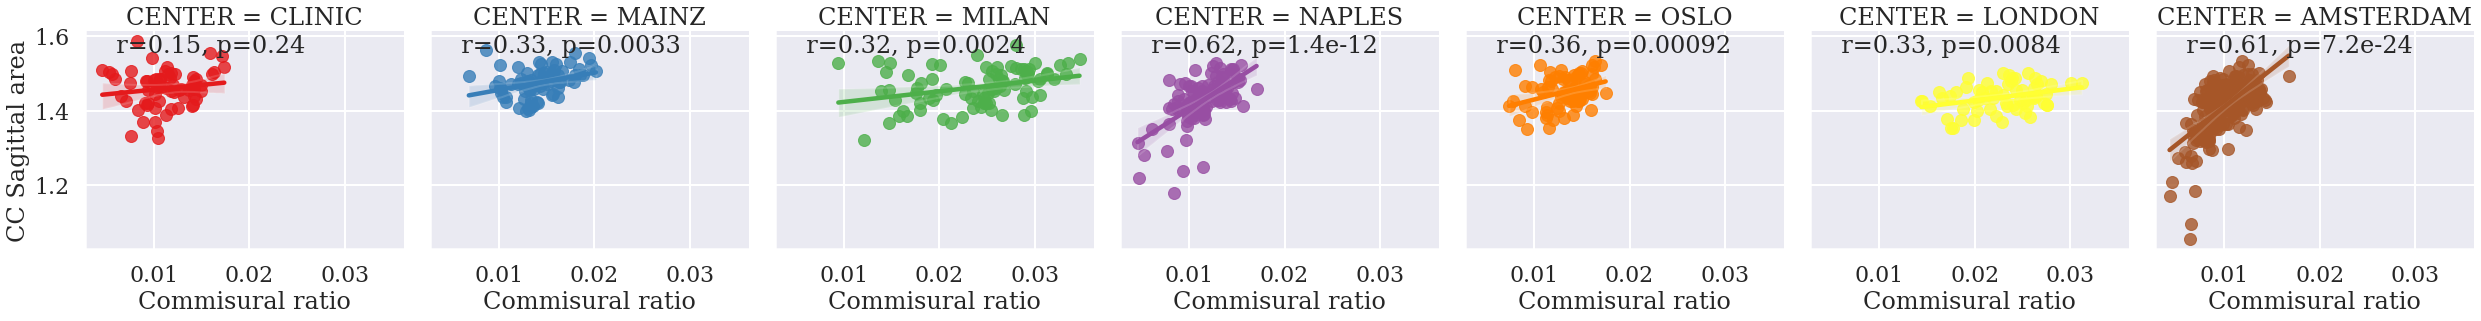

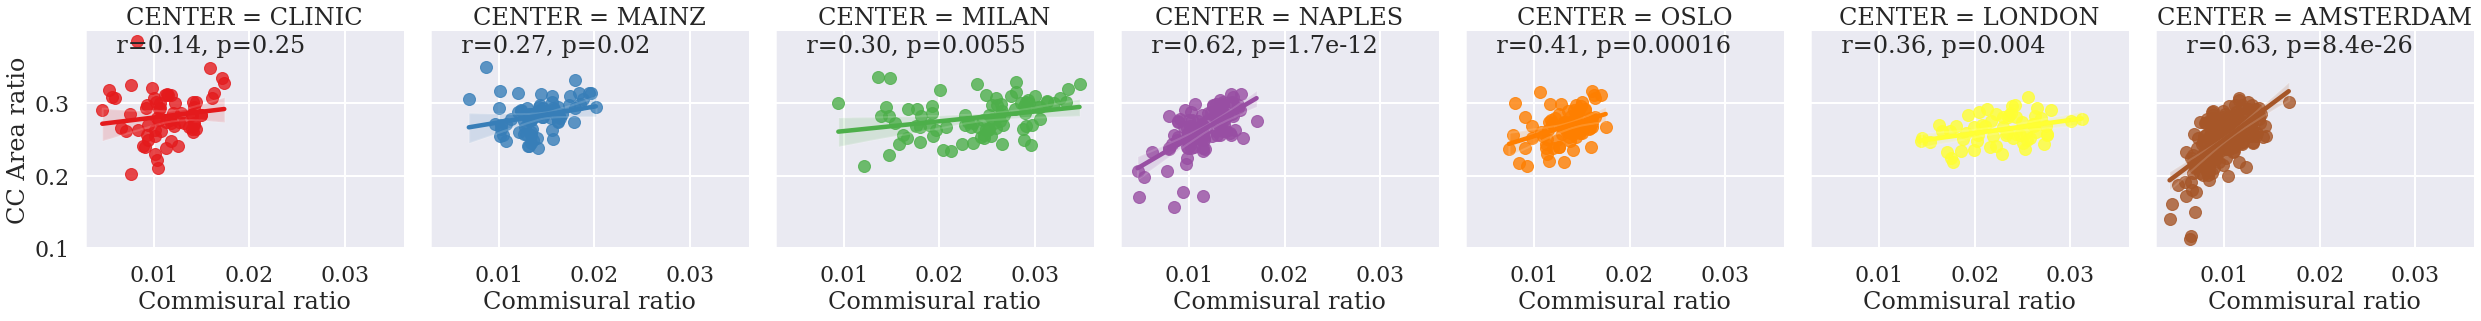

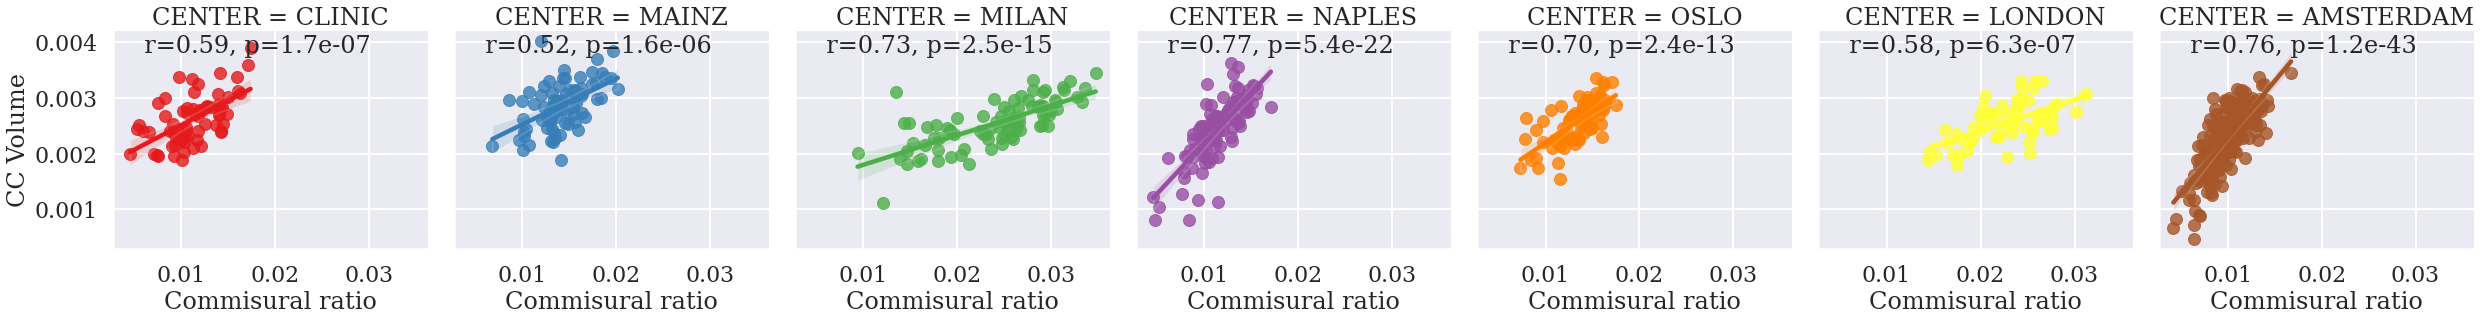

In [6]:
sns.set(style='darkgrid', context='poster', palette='Set1', font="serif")

#LMplot
## Do it per center?
q_list = [(x1, x2), (y1, y2), (z1, z2)]
axis_labels = [("Commisural ratio", "CC Sagittal area"), ("Commisural ratio", "CC Area ratio"), ("Commisural ratio", "CC Volume")]

for (q1, q2), (x_label, y_label) in zip(q_list, axis_labels):
    g = sns.lmplot(data=df_merged, x=f"{q1}", y=f"{q2}", col="CENTER", hue="CENTER", sharex=True, sharey=True)
    g.map_dataframe(annotate, f"{q1}", f"{q2}", multihue=False)

    g.set_axis_labels(x_label, y_label)

